# Visualising mispredicted signs

In [1]:
import utils
from video_dataset import VideoDataset
from torchvision.transforms import v2
from pathlib import Path
import json

In [2]:
split='asl100'
root = '../data/WLASL/WLASL2000'
labels = Path(f'./preprocessed/labels/{split}')
classes_path = Path('./wlasl_class_list.json')
output = Path(f'media/similar_signs')
frame_size=224
num_frames=8
test_instances = labels / 'test_instances_fixed_frange_bboxes_len.json'
test_classes = labels / 'test_classes_fixed_frange_bboxes_len.json'

In [3]:
with open(classes_path, 'r') as f:
  class_list = json.load(f)
  


In [4]:
dataset = VideoDataset(
  root=root,
  instances_path=test_instances,
  classes_path=test_classes,
  num_frames=16,
  )

## Thursday is often not predicted correctly

In [5]:
def print_dict(dic):
  print("{")
  for key, value in dic.items():
    print(f"'{key}': {value}")
  print("}")  
  
print(class_list[99])

thurs1 = dataset.data[256]
thurs2 = dataset.data[257]

print_dict(thurs1)
print_dict(thurs2)

thursday
{
'label_num': 99
'frame_end': 46
'frame_start': 1
'video_id': 58359
'bbox': [51, 41, 212, 222]
}
{
'label_num': 99
'frame_end': 92
'frame_start': 0
'video_id': 70026
'bbox': [61, 30, 199, 235]
}


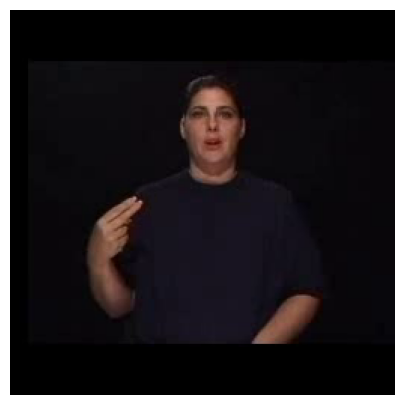

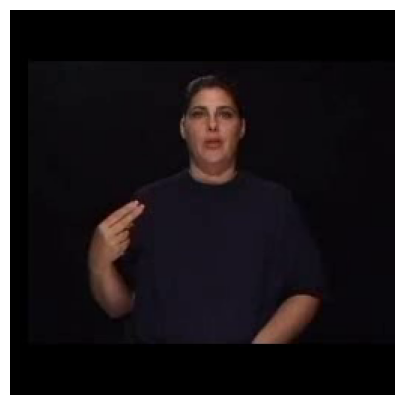

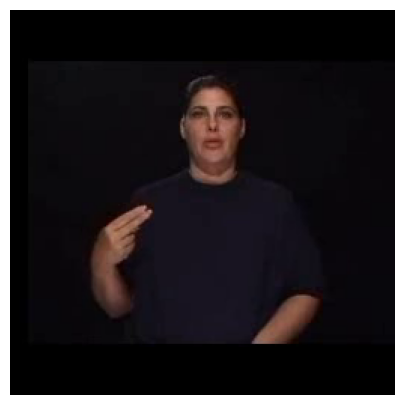

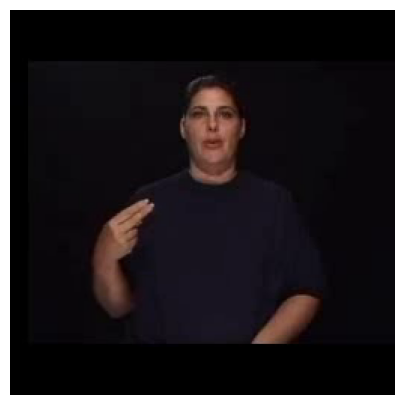

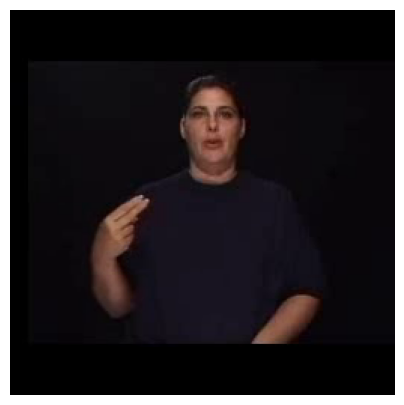

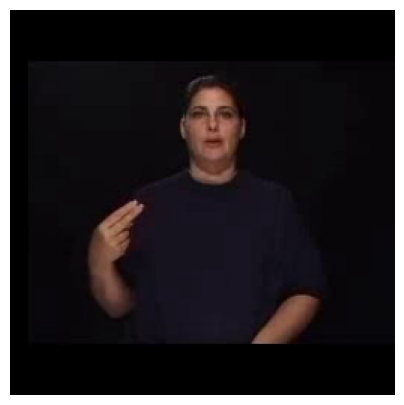

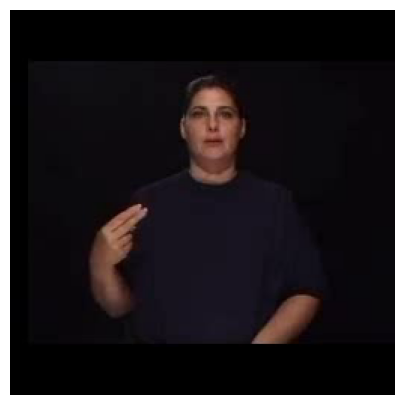

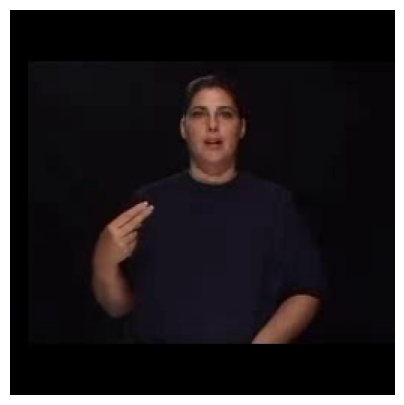

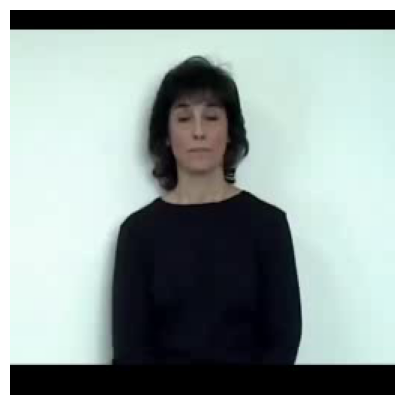

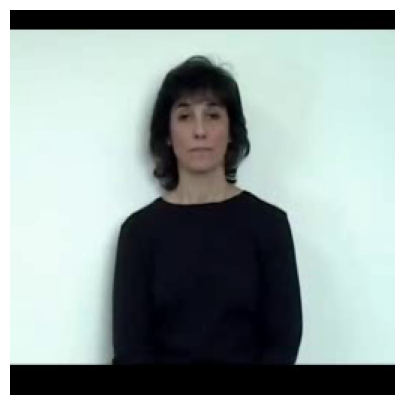

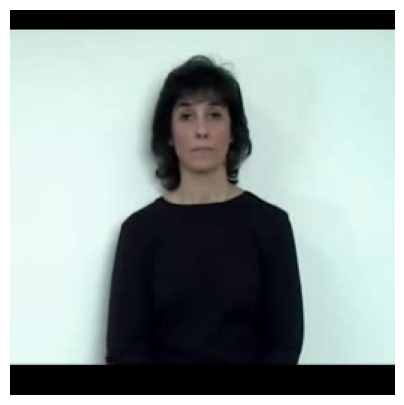

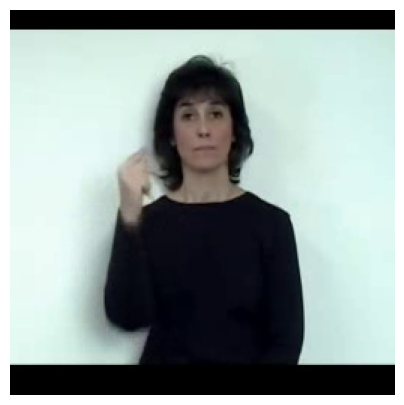

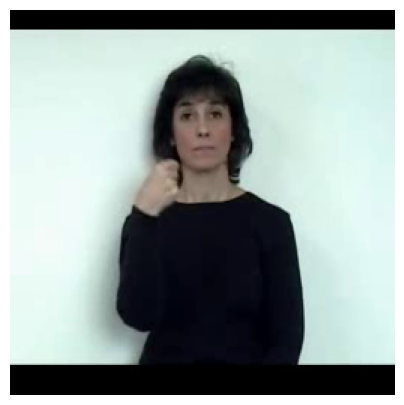

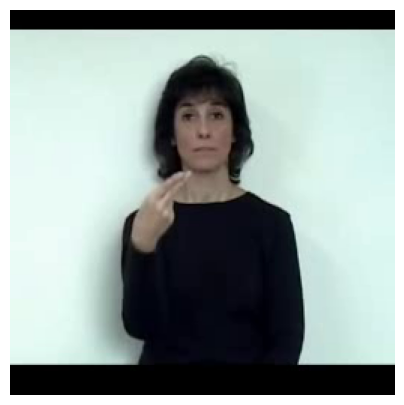

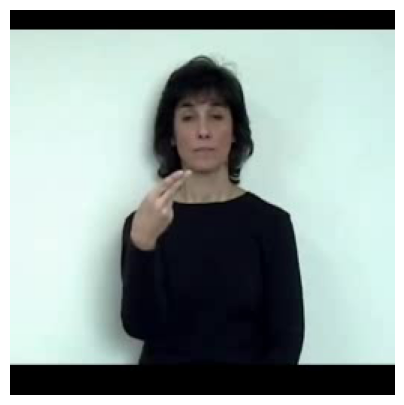

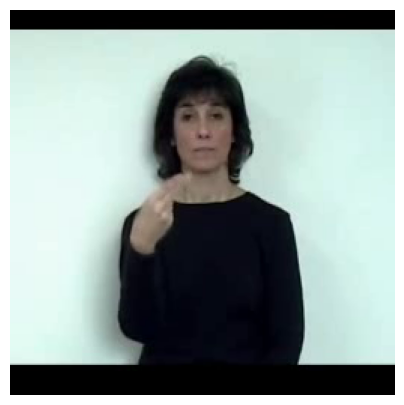

In [6]:
frames1 = dataset.__manual_load__(thurs1)
frames2 = dataset.__manual_load__(thurs2)

thurs1_output = output / 'thurs1'
thurs2_output = output / 'thurs2'
utils.visualise_frames(frames1, num_frames, output=thurs1_output)
utils.visualise_frames(frames2, num_frames, output=thurs2_output)

## It is often confused for dog

In [7]:
dog_idxs = [i for i, x in enumerate(dataset.classes) if x == 'dog']
titems = [dataset.data[i] for i in dog_idxs]


for itm in titems:
  print_dict(itm)

print(class_list[36])

{
'label_num': 36
'frame_end': 74
'frame_start': 1
'video_id': 17097
'bbox': [27, 52, 226, 204]
}
{
'label_num': 36
'frame_end': 78
'frame_start': 1
'video_id': 65506
'bbox': [50, 36, 208, 221]
}
{
'label_num': 36
'frame_end': 31
'frame_start': 1
'video_id': 67578
'bbox': [63, 33, 198, 233]
}
dog


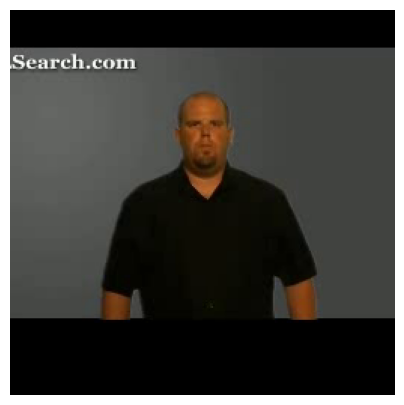

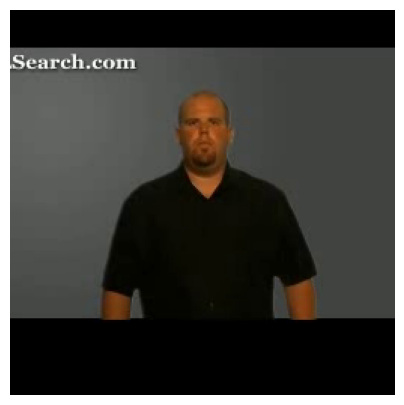

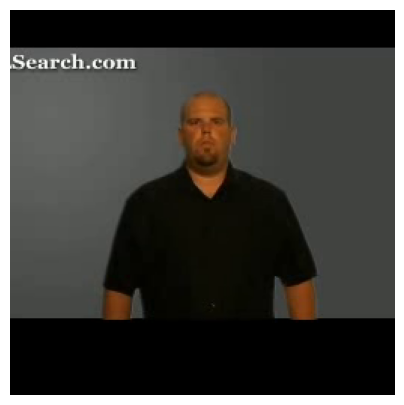

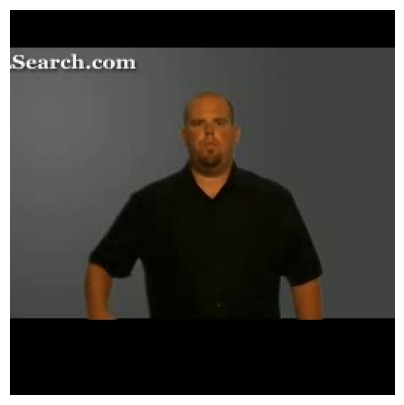

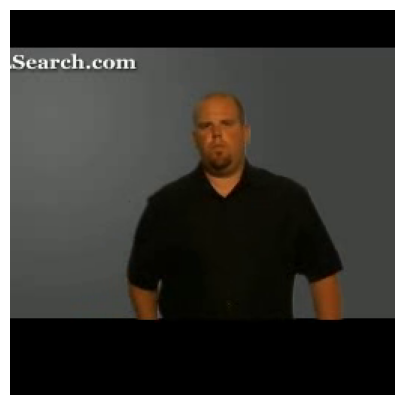

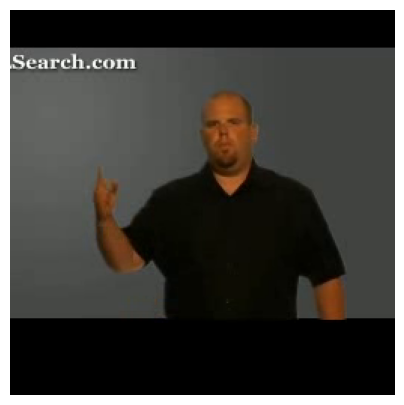

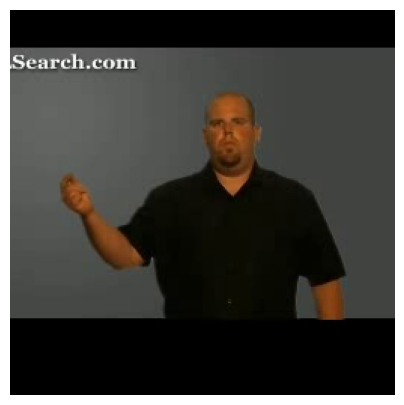

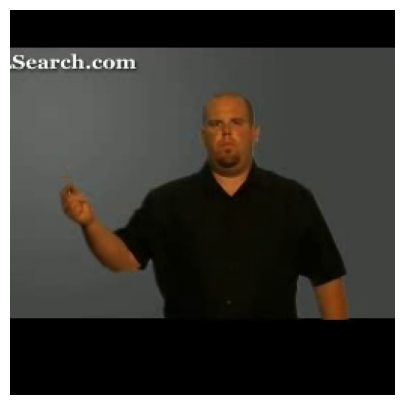

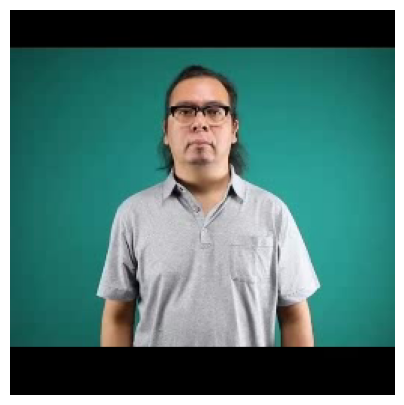

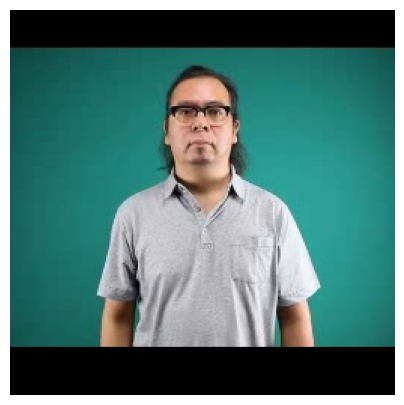

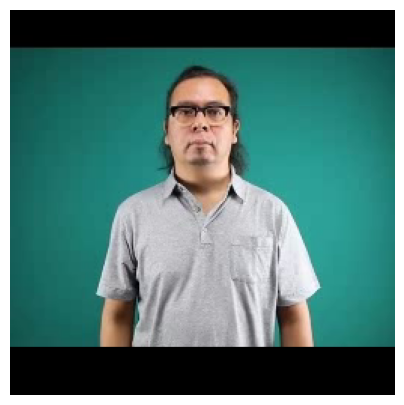

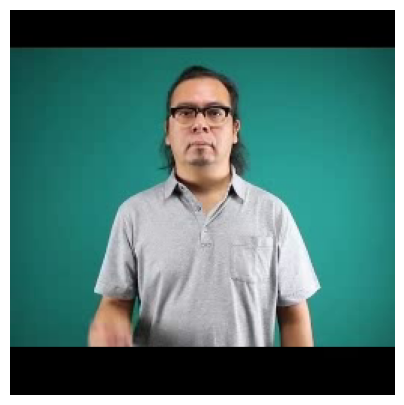

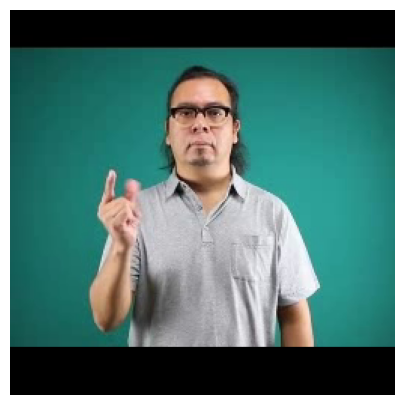

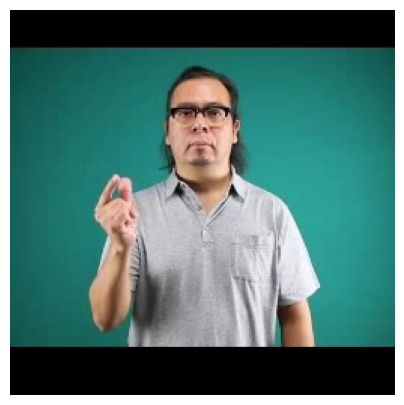

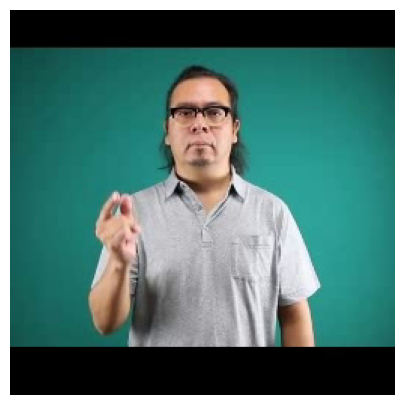

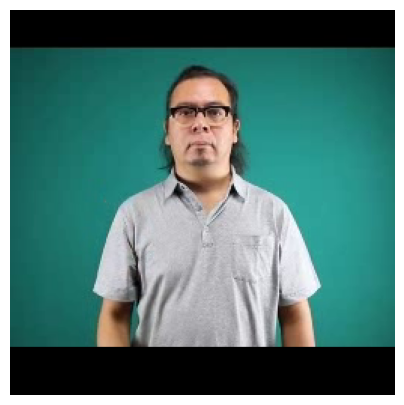

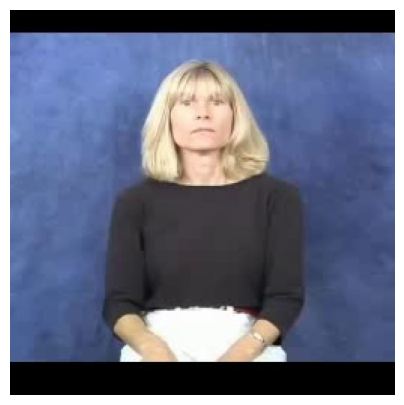

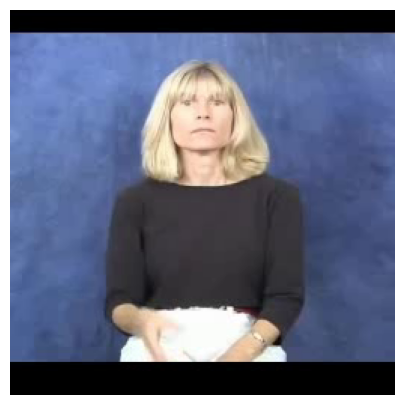

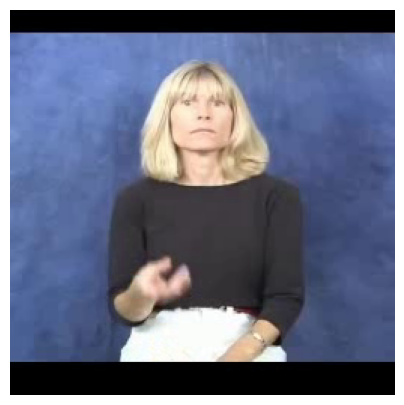

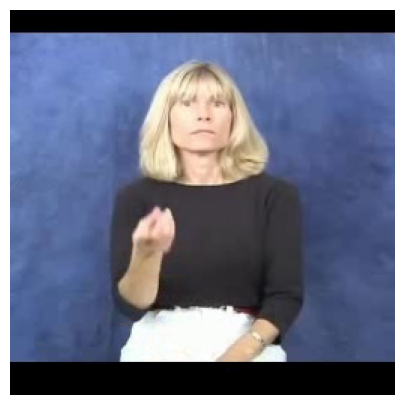

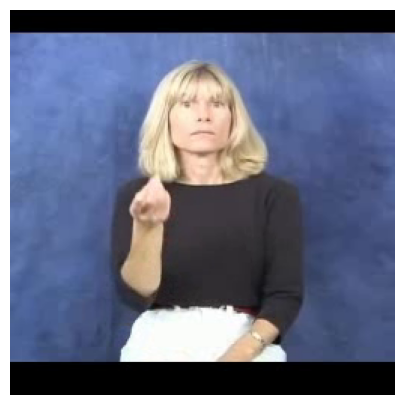

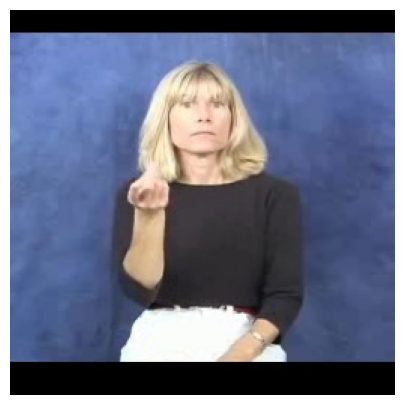

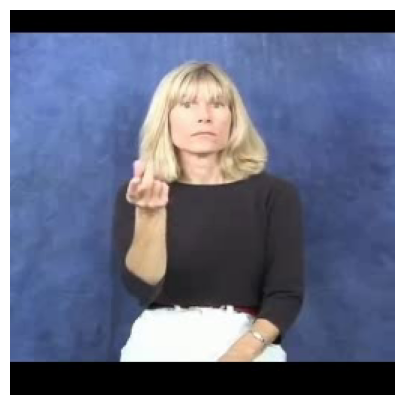

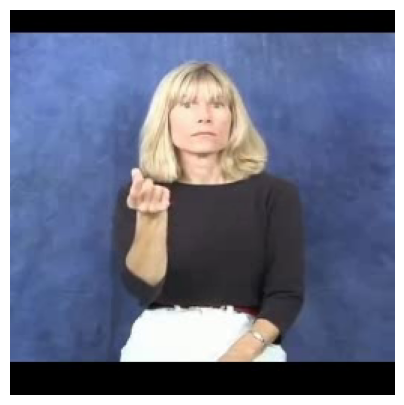

In [8]:

for i, itm in enumerate(titems):
  dframes = dataset.__manual_load__(itm)
  d_output = output / f'dog{i}'
  utils.visualise_frames(dframes, num_frames, output=d_output)